In [1]:
from pixell import enmap, enplot, reproject
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
import healpy as hp

In [2]:
path = '/Users/jaguirre/Data/Mosaics/Updated_mosaics/'
filename = 'mastermapbeamcorInewd2.fits'

In [3]:
# Convenient wrapper for displaying enmaps
def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs)) 

In [77]:
Imosaic = enmap.read_map(path+filename)
gsm_hp = hp.read_map('GSM150MHz.fits')

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [78]:
Imosaic[~np.isfinite(Imosaic)] = 0.

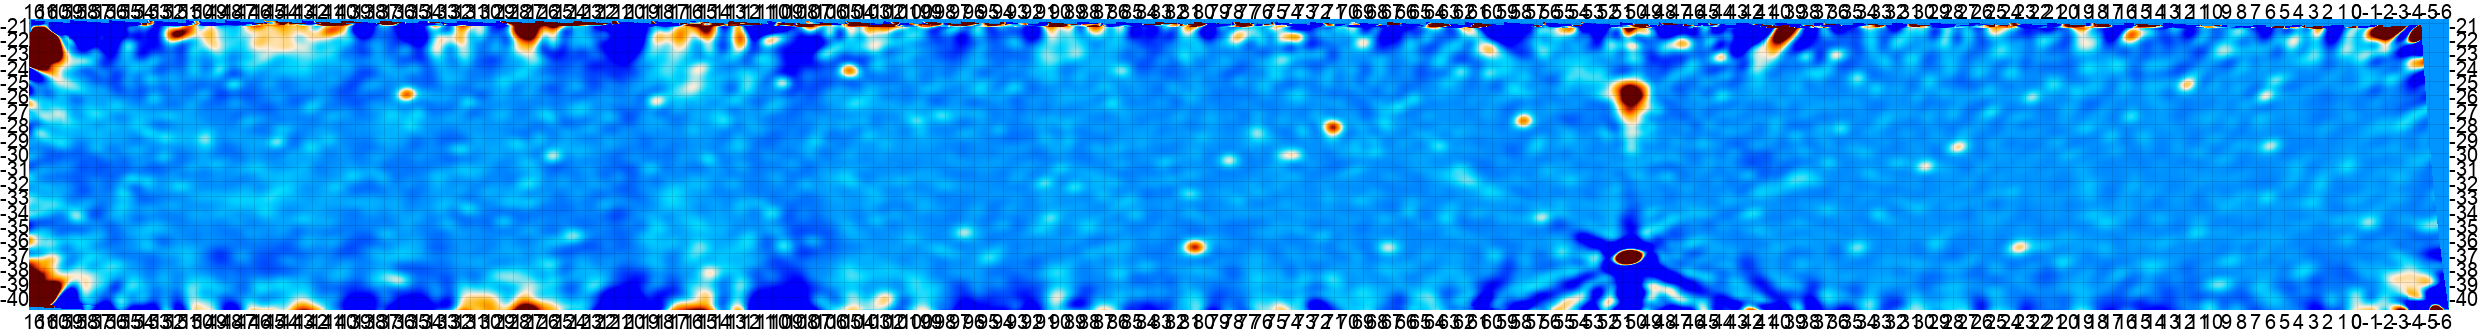

In [79]:
eshow(Imosaic,max=50,min=-15)

In [80]:
#plt.figure(figsize=(15,8))
#plt.imshow(Imosaic, vmin=-15, vmax=50, origin='lower')

In [81]:
# Don't do this with enmap_from_healpix - the harmonic space behavior is bizarre
gsm = reproject.enmap_from_healpix_interp(gsm_hp, Imosaic.shape, Imosaic.wcs)
gsm -= gsm.mean()

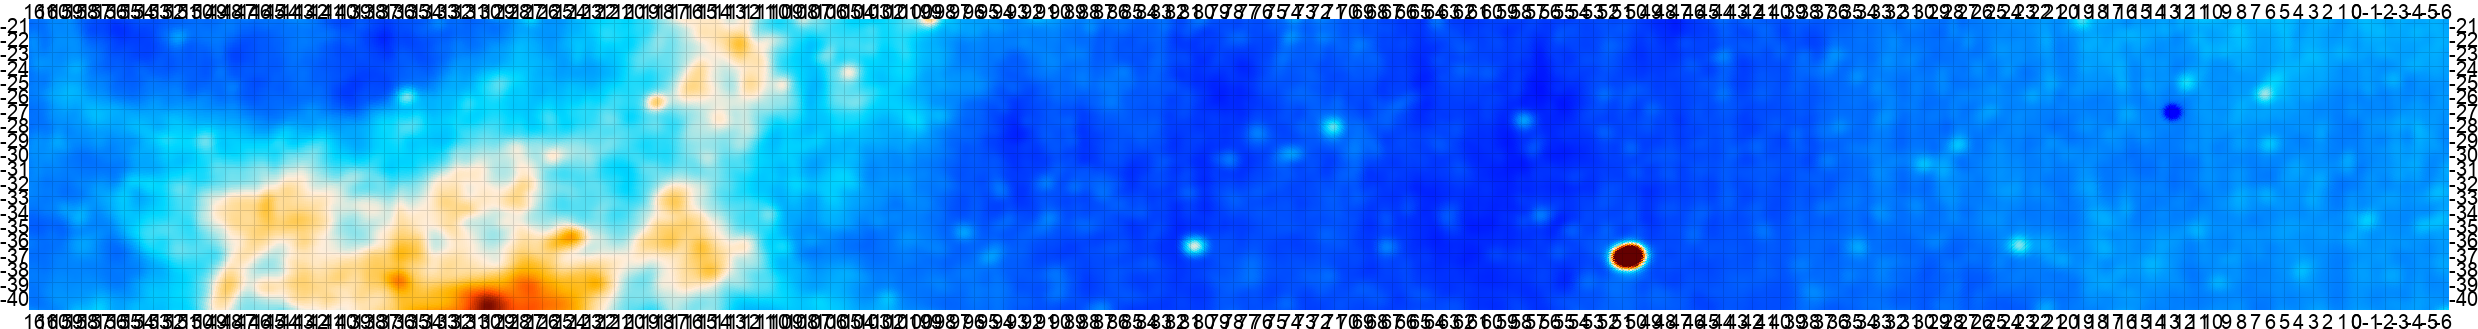

In [82]:
eshow(gsm/3., min=-45, max = 150)

In [83]:
gsm.write('/Users/jaguirre/Data/Mosaics/Updated_mosaics/GSM_HERA_stripe.fits')

In [114]:
# So this embeds the enmap in a healpix map.  Cool.
Imosaic_hp = reproject.healpix_from_enmap_interp(Imosaic)

In [115]:
np.isnan(Imosaic_hp).sum()

0

In [116]:
hp.npix2nside(len(Imosaic_hp))

512

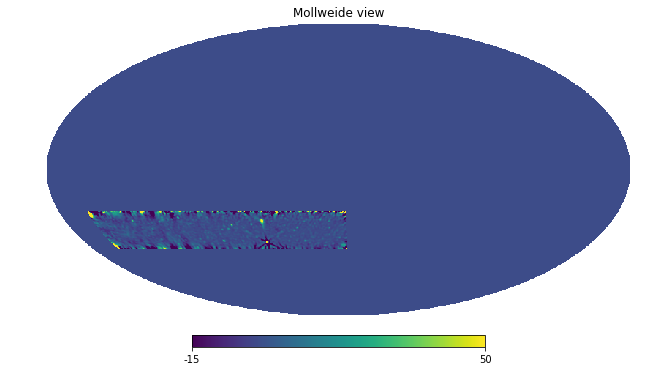

In [117]:
hp.mollview(Imosaic_hp, min=-15, max=50)

In [118]:
Imosaic_hp_nan = Imosaic_hp.copy()
Imosaic_hp_nan[Imosaic_hp == 0] = np.nan

In [119]:
print(np.isnan(Imosaic_hp).sum())
print(np.isnan(Imosaic_hp_nan).sum())

0
2925007


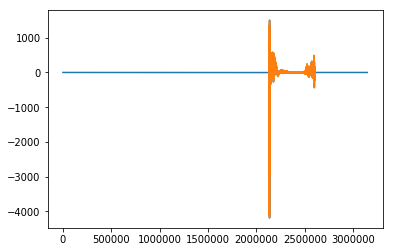

In [120]:
plt.plot(Imosaic_hp)
plt.plot(Imosaic_hp_nan)

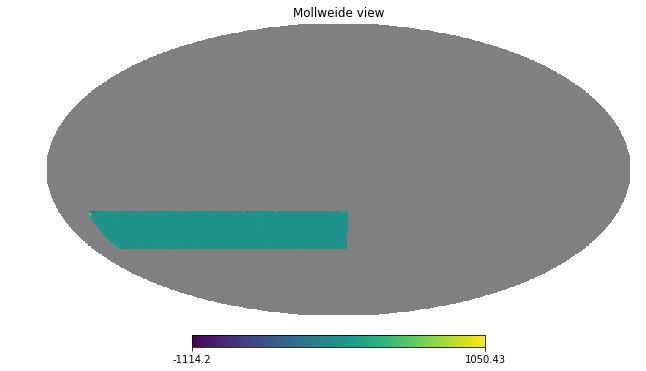

In [121]:
hp.mollview(Imosaic_hp_nan)#, min=-15, max=50)
#plt.savefig('Imosaic_hp.png')

In [122]:
np.isnan(Imosaic_hp_nan).sum()

2925007

In [123]:
# How do I get the GSM actually into equatorial coordinates?  Interestingly, pyGSM doesn't seem to provide the option.
# Neither does healpy.  But I wrote something that does.
def rotate_healpix_map(hpmap, rot=None, coord=None):
    """ Will rotate the pixels of a map into (effectively) a new ordering representing a rotation of the function.  
    Not sure why this isn't implemented in healpy directly (maybe it is).  
    In order to map each pixel exactly to a new one, the transform is only accurate to the pixel size.  """
    
    npix = len(hpmap)
    nside = hp.npix2nside(npix)
    
    rotmap = np.zeros(npix)
    ipix = np.arange(npix)
    t,p = hp.pix2ang(nside,ipix)

    if (rot is not None and coord is None):
        r = hp.Rotator(rot=rot)
    if (coord is not None and rot is None):
        r = hp.Rotator(coord=coord)
    
# For each pixel in the new map, find where it would have come 
# from in the old    
    trot,prot = r(t,p)
    ipix_rot = hp.ang2pix(nside,trot,prot)
    
    rotmap = hpmap[ipix_rot]
    
    return rotmap

In [124]:
gsm_hp_eq = rotate_healpix_map(gsm_hp, coord=['C','G'])

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


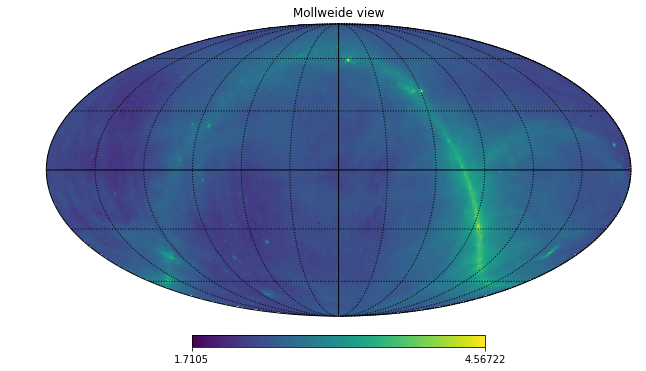

In [125]:
hp.mollview(np.log10(gsm_hp_eq))
hp.graticule()
plt.savefig('GSM_hp_eq.png')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


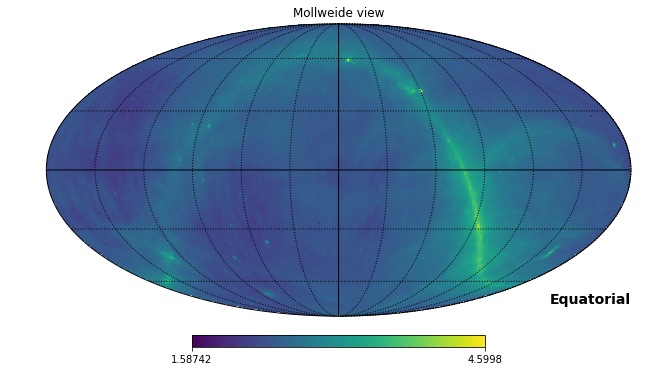

In [126]:
hp.mollview(np.log10(gsm_hp), coord=['G','C'])
hp.graticule()

In [127]:
# Why can't I get this to work?
rescale_gsm = (gsm_hp_eq - gsm_hp_eq.mean())/3.

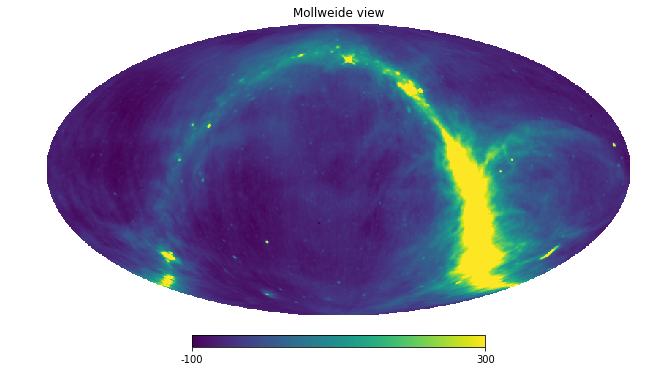

In [135]:
hp.mollview(rescale_gsm, min=-100, max=300)

In [145]:
thefuck = np.isnan(Imosaic_hp_nan)
gsm_plus_hera = Imosaic_hp_nan.copy() - 15.
gsm_plus_hera[thefuck] = rescale_gsm[thefuck] #-45. #(gsm_hp_eq[np.isnan(Imosaic_hp_nan)] - gsm_hp_eq.mean())/3.

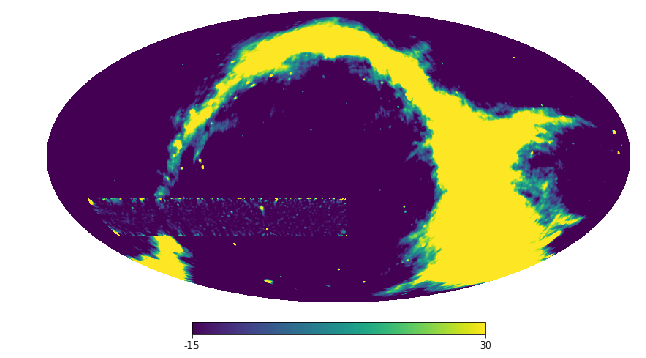

In [147]:
hp.mollview(gsm_plus_hera, min=-15, max = 30, title='')
plt.savefig('gsm_plus_hera.png')

In [149]:
ls gsm_plus_hera.png

gsm_plus_hera.png


In [150]:
pwd

'/Users/jaguirre/Software/JamesPlayground'